In [1]:
!git clone https://github.com/Sang2710/Restoration-and-recolourization photo_restoration

Cloning into 'photo_restoration'...
remote: Enumerating objects: 739, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 739 (delta 29), reused 16 (delta 16), pack-reused 689
Receiving objects: 100% (739/739), 19.93 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (368/368), done.


In [2]:
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

# download the landmark detection model
%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

# download the pretrained model
%cd Face_Enhancement/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Face_Enhancement/checkpoints.zip
!unzip checkpoints.zip
%cd ../

%cd Global/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Global/checkpoints.zip
!unzip checkpoints.zip
%cd ../

/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 15.73 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 15.73 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Face_Detection
--2021-06-04 13:10:06--  http://dlib.net/files/shape_predictor_68_face_landma

In [ ]:
! pip install -r requirements.txt

     |████████████████████████████████| 122kB 12.1MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [4]:
#from google.colab import files
import shutil
import os
basepath = os.getcwd()
upload_path = os.path.join(basepath, "test_images", "upload")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

uploaded = form[upload_path]
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

NameError: name 'form' is not defined

In [39]:
from PIL import Image
for k ,v in uploaded.items():
  image = Image.open('/photo_restoration/test_images/upload/'+k)
new_image = image.resize((256, 256))
!rm -rf '/photo_restoration/test_images/upload/'
os.mkdir(upload_path)
new_image.save('/photo_restoration/test_images/upload/k.jpg')

In [40]:
!python run.py

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/test_images/upload
processing k.jpg
You are using NL + Res
Now you are processing k.png
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
Finish Stage 1 ...


Running Stage 2: Face Detection
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 1 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...




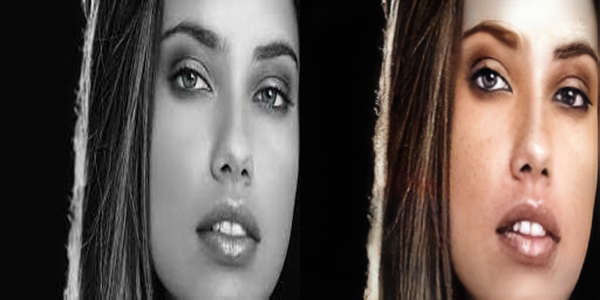

In [41]:
import PIL.Image
import IPython.display
import numpy as np

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine
    
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "final_output"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open('/content/photo_restoration/imgs_out_colored.png')

    display(make_grid(image_original, image_restore))
    print("")